In [ ]:

#PROBLEMÁTICA:  Actualmente la cartera de la organización representa una gran cantidad de ingresos retenidos y requiere fortalecer sus estrategias de cobro para reducir la misma. La empresa actualmente realiza scoring de sus clientes con base en su histórico de cartera.

#SOLUCIÓN: La problemática puede ser atacada desde la ciencia de datos al utilizar el histórico de PQR`s de reclamación y la cantidad de facturas vencidas de un cliente por cada ciclo de facturación para predecir el comportamiento de cartera los mismos.


#PREGUNTA SMART: "¿Cómo se puede utilizar histórico de cantidad de facturas vencidas de un cliente para predecir con un 85% de precisión el número de clientes que incrementarán su deuda en los próximos tres meses, permitiendo así implementar estrategias preventivas antes del final del próximo trimestre?"

#DESGLOSE COMPONENTES PREGUNTA

#Específica: Se enfoca en predecir el número de clientes que incrementarán su cartera.
#Medible: La precisión deseada es del 85%.
#Accionable: Se basa en el scoring actual de la empresa.
#Relevancia: Permite implementar estrategias preventivas, cruciales para la gestión de riesgos.
#Temporalidad: El objetivo es lograr esta predicción antes del final del próximo trimestre.
#Tipo de análisis: predictivo



In [1]:
# Importar librería pandas
import pandas as pd
import matplotlib.pylab as plt

# URL del dataset
filename = "/Users/christianoyola/Documents/GENERAL/Christian/UNIVERSIDAD/MAESTRIA/SEMESTRE 1/ANALISIS EXPLORATORIO DE DATOS/ANALISIS-EXPLORATORIO-DE-DATOS-CFO/BASE ANALISIS BIVARIADO.xlsx"


# Leer el archivo EXCEL
df = pd.read_excel(filename, engine='openpyxl')

df



,CICLO,TOTAL_FACTURAS_VENCIDAS,TOTAL_IDS_CICLO,TOTAL_PQR_RECLAMACION
0,202306,20795,34031,1669
1,202310,22283,34224,1812
2,202309,21907,34209,1690
3,202403,21384,34099,1897
4,202402,22706,34133,1416
5,202307,20410,34072,1334
6,202311,21140,34176,1230
7,202312,21531,34157,1541
8,202308,21447,34177,1732
9,202401,21930,34169,1319


In [2]:
# Para ver cómo luce el dataset, utilizamos el método head().
df.head(5)



,CICLO,TOTAL_FACTURAS_VENCIDAS,TOTAL_IDS_CICLO,TOTAL_PQR_RECLAMACION
0,202306,20795,34031,1669
1,202310,22283,34224,1812
2,202309,21907,34209,1690
3,202403,21384,34099,1897
4,202402,22706,34133,1416


In [ ]:
# VARIABLE SELECCIONADA: FACTURAS_VENCIDAS
# IMPORTANCIA: Permite conocer el comportamiento de cartera en un intervalo de tiempo.

In [3]:
#Obtener el tamaño del dataset.
df.shape

(13, 4)

In [7]:
# Para ver cómo luce el dataset, utilizamos el método tail().
df.tail(5)

,CICLO,TOTAL_FACTURAS_VENCIDAS,TOTAL_IDS_CICLO,TOTAL_PQR_RECLAMACION
8,202308,21447,34177,1732
9,202401,21930,34169,1319
10,202404,47103,109106,1153
11,202405,22058,34094,1141
12,202406,21400,45431,1114


In [32]:
# Para ver una descripcion general utilizamos el método df.describe().
df.describe()

,CICLO,TOTAL_FACTURAS_VENCIDAS,TOTAL_IDS_CICLO,TOTAL_PQR_RECLAMACION
count,13.000000,13.000000,13.000000,13.000000
mean,202352.615385,23545.692308,40775.230769,1465.230769
std,49.072291,7104.469584,20766.724313,273.551078
min,202306.000000,20410.000000,34031.000000,1114.000000
25%,202309.000000,21384.000000,34099.000000,1230.000000
50%,202312.000000,21531.000000,34169.000000,1416.000000
75%,202403.000000,22058.000000,34209.000000,1690.000000
max,202406.000000,47103.000000,109106.000000,1897.000000


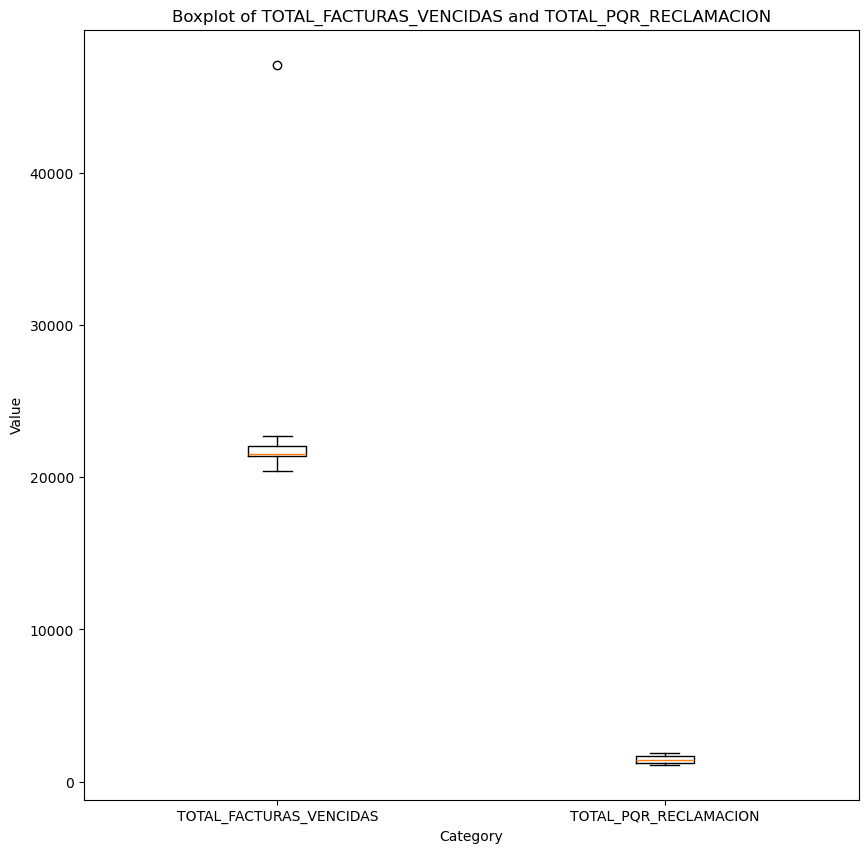

In [13]:
# Crear el diagrama de caja y bigotes
plt.figure(figsize=(10, 10))

# Crear listas con las columnas a graficar
data = [df['TOTAL_FACTURAS_VENCIDAS'], df['TOTAL_PQR_RECLAMACION']]

# Crear gráfico
plt.boxplot(data, labels=['TOTAL_FACTURAS_VENCIDAS', 'TOTAL_PQR_RECLAMACION'])

# Personalizar gráfico
plt.title('Boxplot of TOTAL_FACTURAS_VENCIDAS and TOTAL_PQR_RECLAMACION')
plt.xlabel('Category')
plt.ylabel('Value')

# Mostrar gráfico
plt.show()


<Axes: ylabel='Frequency'>

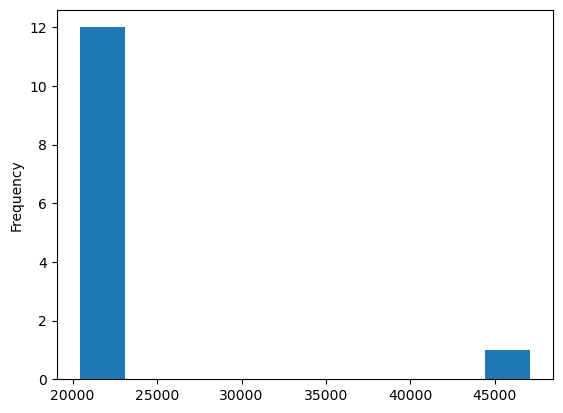

In [40]:
# HISTOGRAMA
df.TOTAL_FACTURAS_VENCIDAS.plot.hist()

#Conclusión:: hay presencia de un dato atípico en el ciclo 202404 en donde se ve influido por la cantidad de facturas anuladas para ese ciclo. Se debe ajustar consulta para extraer la información.


In [42]:
#Frecuencia de valores

df.TOTAL_FACTURAS_VENCIDAS.value_counts()

TOTAL_FACTURAS_VENCIDAS
20795    1
22283    1
21907    1
21384    1
22706    1
20410    1
21140    1
21531    1
21447    1
21930    1
47103    1
22058    1
21400    1
Name: count, dtype: int64

In [44]:
#Tipos de datos

df.dtypes

CICLO                      int64
TOTAL_FACTURAS_VENCIDAS    int64
TOTAL_IDS_CICLO            int64
TOTAL_PQR_RECLAMACION      int64
dtype: object

In [46]:
#Top 10 valores mas grandes de la variable TOTAL_FACTURAS_VENCIDAS

df.nlargest(10,'TOTAL_FACTURAS_VENCIDAS')


,CICLO,TOTAL_FACTURAS_VENCIDAS,TOTAL_IDS_CICLO,TOTAL_PQR_RECLAMACION
10,202404,47103,109106,1153
4,202402,22706,34133,1416
1,202310,22283,34224,1812
11,202405,22058,34094,1141
9,202401,21930,34169,1319
2,202309,21907,34209,1690
7,202312,21531,34157,1541
8,202308,21447,34177,1732
12,202406,21400,45431,1114
3,202403,21384,34099,1897


In [48]:
#Top 10 valores mas pequeños de la variable TOTAL_FACTURAS_VENCIDAS

df.nsmallest(10,'TOTAL_FACTURAS_VENCIDAS')

,CICLO,TOTAL_FACTURAS_VENCIDAS,TOTAL_IDS_CICLO,TOTAL_PQR_RECLAMACION
5,202307,20410,34072,1334
0,202306,20795,34031,1669
6,202311,21140,34176,1230
3,202403,21384,34099,1897
12,202406,21400,45431,1114
8,202308,21447,34177,1732
7,202312,21531,34157,1541
2,202309,21907,34209,1690
9,202401,21930,34169,1319
11,202405,22058,34094,1141


In [50]:
#Dterminar si hay presencia de nulos.

df.isna().sum()

CICLO                      0
TOTAL_FACTURAS_VENCIDAS    0
TOTAL_IDS_CICLO            0
TOTAL_PQR_RECLAMACION      0
dtype: int64

In [52]:
#Información dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   CICLO                    13 non-null     int64
 1   TOTAL_FACTURAS_VENCIDAS  13 non-null     int64
 2   TOTAL_IDS_CICLO          13 non-null     int64
 3   TOTAL_PQR_RECLAMACION    13 non-null     int64
dtypes: int64(4)
memory usage: 548.0 bytes


In [10]:
#CONCLUSIONES: Variable no presenta distribución normal y se ve influida por datos atípicos. Se de debe ajustar consulta para extraer información.


<Axes: xlabel='TOTAL_FACTURAS_VENCIDAS', ylabel='TOTAL_PQR_RECLAMACION'>

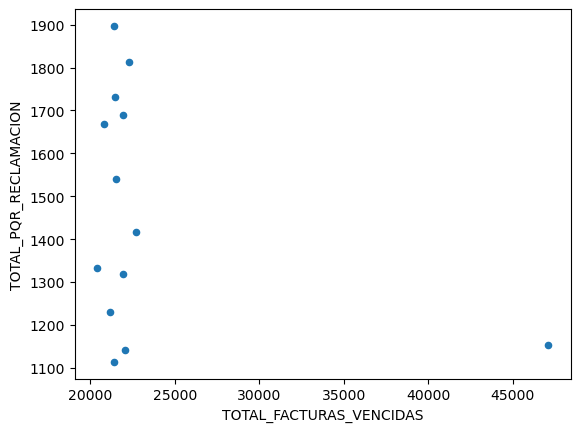

In [54]:
#Diagrama de dispersion 
df.plot.scatter(x='TOTAL_FACTURAS_VENCIDAS',y='TOTAL_PQR_RECLAMACION')

In [64]:
# Calcular el coeficiente de correlación de Pearson entre dos columnas
coeficiente_correlacion = df['TOTAL_FACTURAS_VENCIDAS'].corr(df['TOTAL_PQR_RECLAMACION'])

# Mostrar el coeficiente de correlación
print(f'Coeficiente de correlación de Pearson: {coeficiente_correlacion}')
print('Conclusión: Hay una relación negativa moderada. Cuando una variable aumenta, la otra tiende a disminuir, aunque con cierta variabilidad. Se debe modificar enforque del análisis agrupando por ID la cantidad de ciclos y la cantidad de PQR`s de reclamación')

Coeficiente de correlación de Pearson: -0.33775672137830604
Conclusión: Hay una relación negativa moderada. Cuando una variable aumenta, la otra tiende a disminuir, aunque con cierta variabilidad.
